In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.sandwich_covariance import S_hac_simple

In [16]:
def make_auto_corr(x, rho):
    y = x.copy()
    for i in range(1, x.shape[0]):
        y[i] = (1 - rho) * x[i] + rho * y[i-1]
    return y
    
def gen_data(n, nTest, rho, sigData, sigErrInt):
    z = np.random.normal(0, sigData, (n, nTest))
    x = z + np.random.normal(0, sigErrInt, (n, nTest))
    y = z + np.random.normal(0, sigErrInt, (n, nTest))
    x = make_auto_corr(x, rho)
    y = make_auto_corr(y, rho)
    return x, y

def hac_corr(x, y, lag):
    data = np.array([x, y])
    cov = S_hac_simple(data.T, nlags=lag)
    corr = cov[0, 1] / np.sqrt(cov[0,0]*cov[1,1])
    return corr

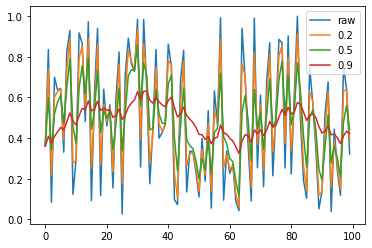

In [25]:
# Test autocorrelation
x = np.random.uniform(0, 1, 100)
x1 = make_auto_corr(x, 0.2)
x2 = make_auto_corr(x, 0.5)
x3 = make_auto_corr(x, 0.9)

plt.figure()
plt.plot(x, label='raw')
plt.plot(x1, label='0.2')
plt.plot(x2, label='0.5')
plt.plot(x3, label='0.9')
plt.title('White noise with different autocorrelation values')
plt.legend()
plt.show()

## Accuracy using naive Pearson's correlation

In [33]:
rhoLst = 1 - 10 ** np.linspace(-2, -0.5, 10)
nDataLst = (10**np.linspace(1, 6, 40)).astype(int)

rezRhoN = np.zeros((10, 40, 20))
for iRho, rho in enumerate(rhoLst):
    print(iRho)
    for iN, n in enumerate(nDataLst):
        x, y = gen_data(n, 20, rho, 1, 1)
        
        for iTest in range(20):    
            rezRhoN[iRho, iN, iTest] = np.corrcoef(x[:, iTest], y[:, iTest])[0, 1]

0
1
2
3
4
5
6
7
8
9


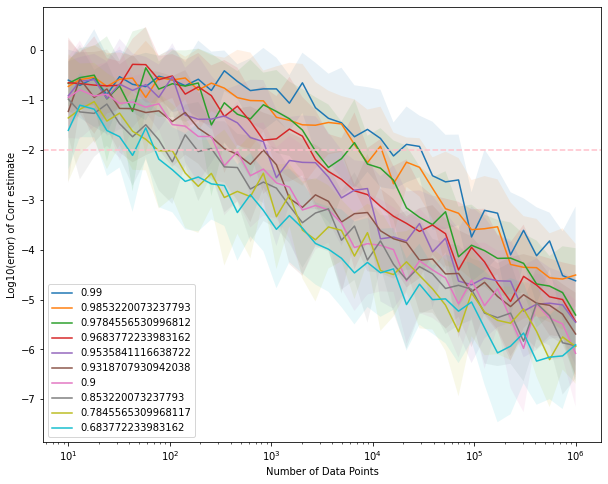

In [35]:
# I have to use log values on the y-axis, otherwise error bars do not display correctly
fig, ax = plt.subplots(figsize=(10,8))
for iRho, rho in enumerate(rhoLst):
    logL = np.log10((rezRhoN[iRho] - 0.5)**2)
    
    mu = np.mean(logL, axis=1)
    std = np.std(logL, axis=1)
    
    ax.semilogx(nDataLst, mu, label=str(rho))
    ax.fill_between(nDataLst, mu-std, mu+std, alpha=0.1)
    
ax.axhline(y=-2, color='pink', linestyle='--')
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Log10(error) of Corr estimate')
plt.legend()
plt.show()

## Now for the HAC estimator

In [19]:
rhoLst = 1 - 10 ** np.linspace(-2, -0.5, 10)
nDataLst = (10**np.linspace(1, 6, 40)).astype(int)

rezRhoN = np.zeros((10, 40, 20))
for iRho, rho in enumerate(rhoLst):
    for iN, n in enumerate(nDataLst):
        print(iRho, iN)
        x, y = gen_data(n, 20, rho, 1, 1)
        
        for iTest in range(20):
            rezRhoN[iRho, iN, iTest] = hac_corr(x[:, iTest], y[:, iTest], 100)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


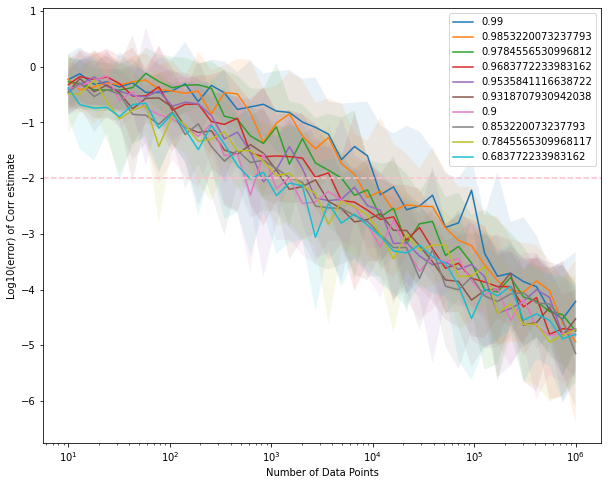

In [20]:
# I have to use log values on the y-axis, otherwise error bars do not display correctly
fig, ax = plt.subplots(figsize=(10,8))
for iRho, rho in enumerate(rhoLst):
    logL = np.log10((rezRhoN[iRho] - 0.5)**2)
    
    mu = np.mean(logL, axis=1)
    std = np.std(logL, axis=1)
    
    ax.semilogx(nDataLst, mu, label=str(rho))
    ax.fill_between(nDataLst, mu-std, mu+std, alpha=0.1)
    
ax.axhline(y=-2, color='pink', linestyle='--')
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Log10(error) of Corr estimate')
plt.legend()
plt.show()